In [1]:
import phoebe
import numpy as np
from spice.models.phoebe_model import PhoebeModel

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.


In [2]:
import matplotlib
%matplotlib inline

In [3]:
import astropy.units as u
u.solRad.to(u.cm)

69570000000.0

In [4]:
from phoebe.parameters.dataset import _mesh_columns

In [5]:
_mesh_columns

['volume',
 'xs',
 'ys',
 'zs',
 'vxs',
 'vys',
 'vzs',
 'nxs',
 'nys',
 'nzs',
 'us',
 'vs',
 'ws',
 'vus',
 'vvs',
 'vws',
 'nus',
 'nvs',
 'nws',
 'areas',
 'loggs',
 'teffs',
 'rprojs',
 'mus',
 'visibilities',
 'visible_centroids',
 'rs']

In [6]:
b = phoebe.default_binary()
times = np.linspace(0, 24*3600, 100)
COLUMNS = _mesh_columns
b.add_dataset('mesh', times=times, columns=COLUMNS, dataset='mesh01')
b.run_compute(irrad_method='none')

100%|██████████| 100/100 [00:01<00:00, 64.73it/s]


<ParameterSet: 6203 parameters | components: primary, secondary>

In [23]:
b.get_quantity('period', component='binary')

<Quantity 1. d>

In [10]:
from spice.models.phoebe_utils import PhoebeConfig

In [11]:
p = PhoebeConfig(b, 'mesh01')

In [12]:
import astropy.units as u
b.get_quantity('period').unit.to(u.s)

ValueError: 5 results found: ['period@primary@star@component', 'period@secondary@star@component', 'period@binary@orbit@component', 'period@primary@star@constraint', 'period@secondary@star@constraint']

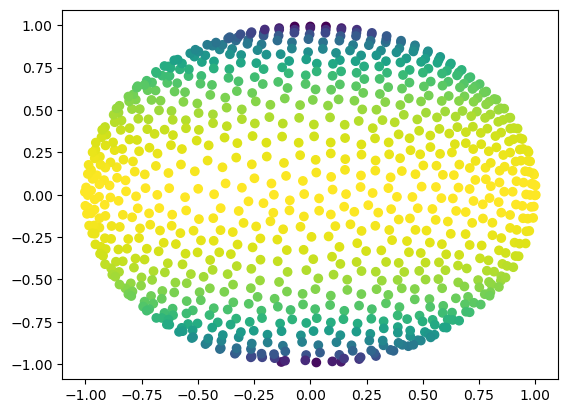

In [10]:
import matplotlib.pyplot as plt
plt.scatter(b.get_parameter(qualifier='us', kind='mesh', time=0.).value[vis],
            b.get_parameter(qualifier='vs', kind='mesh', time=0.).value[vis],
            c=proj_vels[vis], cmap='viridis')

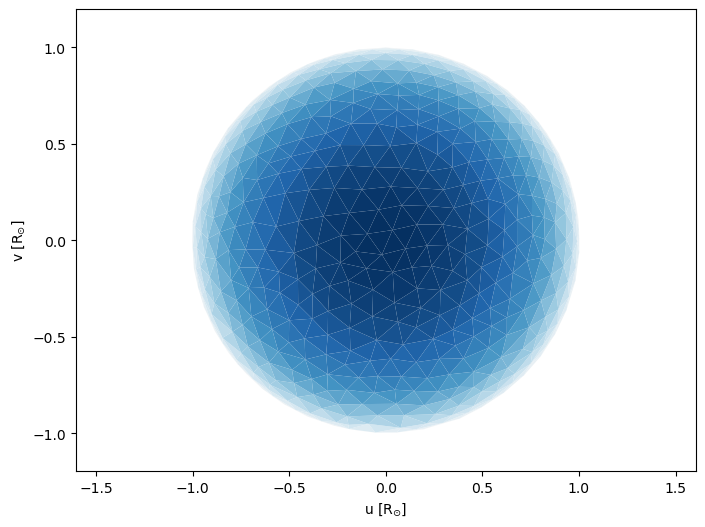

In [11]:

afig, mplfig = b.plot(kind='mesh', time=times[0], x='us', y='vs', fc='vus', ec='none', show=True, animate=False)

In [12]:
b.get_quantity('period')

<Quantity 1. d>

In [13]:
b.get_parameter(qualifier='vys', kind='mesh', time=0.).description

'Y velocity of center of triangles'

In [14]:
p.get_parameter(0., 'vs')

array([ 0.99233005,  0.99233005,  0.99233005, ..., -0.95926476,
       -0.93800165, -0.94052385])

In [16]:
b.get_quantity('mass', component='secondary', context='component')

<Quantity 0.99881314 solMass>

In [15]:
b.get_parameter(qualifier='us', kind='mesh', time=0.).description

'U coordinate of center of triangles in the plane-of-sky'

In [16]:
b.get_parameter(qualifier='us', kind='mesh', time=0.)

<Parameter: us=[ 6.95468502e-02 -1.39218355e-17 -6.95468502e-02 ...
 -2.13770970e-01 -2.16994261e-01 -1.61341854e-01] solRad | keys: description, value, default_unit, visible_if, required_shape, copy_for, readonly, advanced, latexfmt>

In [17]:
p.get_parameter(0., 'rprojs')

array([0.99319411, 0.99077169, 0.99319411, ..., 0.98081445, 0.96025349,
       0.95254531])

In [18]:
p.get_loggs(0.)

array([4.44180955, 4.44180955, 4.44180955, ..., 4.44107348, 4.44059425,
       4.44064471])

In [17]:
pm = PhoebeModel.construct(p, 0., component='secondary')

In [18]:
import matplotlib.pyplot as plt

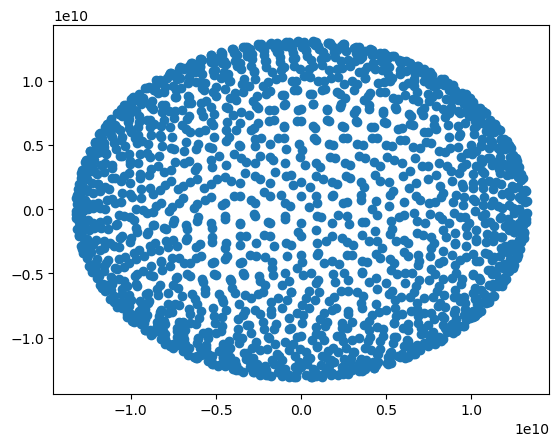

In [19]:
plt.figure()
plt.scatter(pm.centers[:, 0], pm.centers[:, 1])

In [24]:
from spice.models.mesh_transform import transform
transform(pm, np.zeros(3))

ValueError: PHOEBE models are read-only in SPICE - the position is already evaluated in the PHOEBE model.

In [26]:
from spice.spectrum import simulate_spectrum
from transformer_payne import Blackbody

In [32]:
bb = Blackbody()

In [37]:
bb.parameter_names

['teff']